# Breast Cancer Classification Analysis
This document provides a comprehensive analysis of breast cancer classification using various machine learning models and techniques.

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

## Data Loading and Preprocessing

The dataset used for analysis is the Breast Cancer Wisconsin (Diagnostic) Dataset, available through the scikit-learn library.
- The dataset is loaded using `load_breast_cancer` from `sklearn.datasets`.
- Features and target variables are separated into `X` and `y`.
- Train-test split is performed with a test size of 20%.

In [10]:
# Load the dataset
cancer = load_breast_cancer()

# Extract features (X) and target (y)
X = cancer.data
y = cancer.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)


(455, 30)
(455,)

(114, 30)
(114,)


## Decision Tree Model Analysis

A Decision Tree Classifier is trained with different depths and criteria (Gini and Entropy):

- Train and test accuracies are computed and stored for different tree depths and criteria.
- The accuracies are plotted against the tree depths for analysis.


In [11]:
depths = [1, 2, 3, 4, 5, 6]
criteria = ['gini', 'entropy']

results = {}

for criterion in criteria:
    criterion_results = []
    for depth in depths:
        tree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=0)
        tree.fit(X_train, y_train)
        y_pred_train = tree.predict(X_train)
        y_pred_test = tree.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        criterion_results.append((train_accuracy, test_accuracy))
    results[criterion] = criterion_results

# Printing results
for criterion, criterion_results in results.items():
    print(f"Results for criterion '{criterion}':")
    for depth, (train_accuracy, test_accuracy) in zip(depths, criterion_results):
        print(f"Depth {depth}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")


Results for criterion 'gini':
Depth 1: Train Accuracy = 0.9231, Test Accuracy = 0.9035
Depth 2: Train Accuracy = 0.9516, Test Accuracy = 0.9649
Depth 3: Train Accuracy = 0.9714, Test Accuracy = 0.9649
Depth 4: Train Accuracy = 0.9846, Test Accuracy = 0.9561
Depth 5: Train Accuracy = 0.9890, Test Accuracy = 0.9474
Depth 6: Train Accuracy = 0.9934, Test Accuracy = 0.9474
Results for criterion 'entropy':
Depth 1: Train Accuracy = 0.9231, Test Accuracy = 0.9035
Depth 2: Train Accuracy = 0.9319, Test Accuracy = 0.9211
Depth 3: Train Accuracy = 0.9648, Test Accuracy = 0.9474
Depth 4: Train Accuracy = 0.9868, Test Accuracy = 0.9386
Depth 5: Train Accuracy = 0.9912, Test Accuracy = 0.9211
Depth 6: Train Accuracy = 0.9934, Test Accuracy = 0.9035


## Plotting Accuracy Comparison

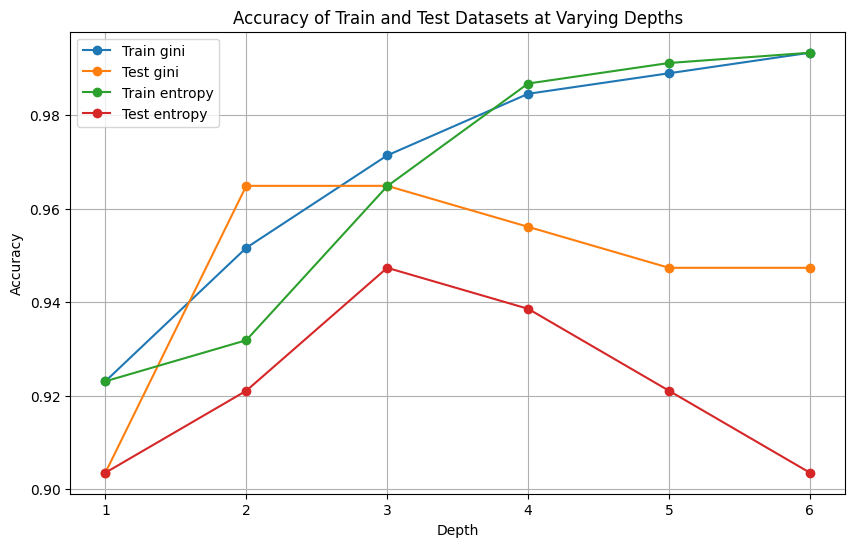

In [12]:
# Plotting accuracy trends
plt.figure(figsize=(10, 6))

for criterion, criterion_results in results.items():
    train_acc = [train_accuracy for train_accuracy, _ in criterion_results]
    test_acc = [test_accuracy for _, test_accuracy in criterion_results]
    plt.plot(depths, train_acc, marker='o', label=f'Train {criterion}')
    plt.plot(depths, test_acc, marker='o', label=f'Test {criterion}')

plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy of Train and Test Datasets at Varying Depths')
plt.legend()
plt.grid(True)
plt.show()


## Selected Decision Tree Model

Based on the analysis, a Decision Tree with a selected depth and criterion is chosen for further analysis.

- Feature importances are extracted and important features are identified.
- Important features along with their importance scores are printed.

In [14]:
# Selecting the Decision Tree with depth = 3 and criterion = 'gini'
selected_depth = 4
selected_criterion = 'entropy'

tree_selected = DecisionTreeClassifier(criterion=selected_criterion, max_depth=selected_depth, random_state=0)
tree_selected.fit(X_train, y_train)

# Extracting feature importances from the selected tree
feature_importances = tree_selected.feature_importances_

# Identifying important features
important_features_dict = {}
for i, importance in enumerate(feature_importances):
    if importance > 0:
        important_features_dict[cancer.feature_names[i]] = importance

# Printing important features
print(f"Number of Important Features: {len(important_features_dict)}")
print("\nDictionary of Important Features:")
for feature, importance in important_features_dict.items():
    print(f"\t{feature}: {importance:.4f}")


Number of Important Features: 8

Dictionary of Important Features:
	mean texture: 0.0279
	mean smoothness: 0.0234
	mean symmetry: 0.0241
	radius error: 0.0217
	symmetry error: 0.0224
	worst texture: 0.0461
	worst perimeter: 0.2010
	worst concave points: 0.6334


## SVM Model Analysis

Support Vector Machine (SVM) Classifier is utilized:

- Data is standardized using `StandardScaler`.
- SVM is trained on the standardized data.
- Train and test set accuracies for the SVM model are printed.

In [17]:
# Step 7: SVM model
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

svm = SVC(kernel='rbf', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

Y_pred_train_svm = svm.predict(X_train_std)
print("SVM Train Set Accuracy: ", accuracy_score(y_train, Y_pred_train_svm))

Y_pred_test_svm = svm.predict(X_test_std)
print("SVM Test Set Accuracy: ", accuracy_score(y_test, Y_pred_test_svm))

SVM Train Set Accuracy:  0.9846153846153847
SVM Test Set Accuracy:  0.9824561403508771


## PCA and Decision Boundary Visualization for SVM

Principal Component Analysis (PCA) is applied to visualize the decision boundary for the SVM model:

- PCA is performed on the standardized training data.
- SVM is trained on the PCA-transformed data.
- Decision boundaries are visualized using `plot_decision_regions` from `mlxtend.plotting`.


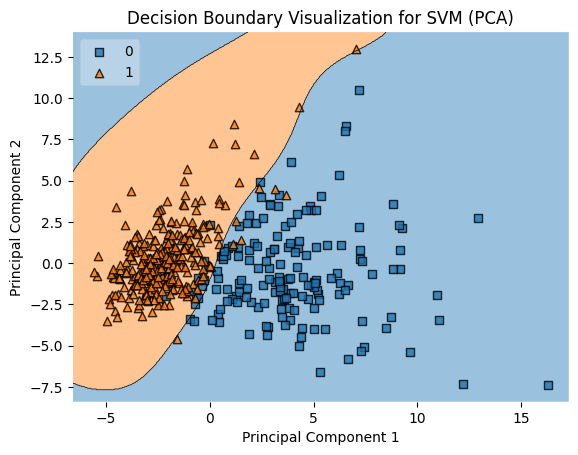

In [30]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Assuming 'X_train_std' is your standardized training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)

# Assuming 'svm' is the trained SVM model
svm.fit(X_train_pca, y_train)

# Plotting decision boundary
plot_decision_regions(X_train_pca, y_train, clf=svm, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary Visualization for SVM (PCA)')
plt.show()


## Confusion Matrix for SVM

A confusion matrix is created to analyze the SVM model's performance:

- The SVM model is re-trained on the standardized data.
- Predictions are made, and a confusion matrix is generated and displayed using `seaborn`.


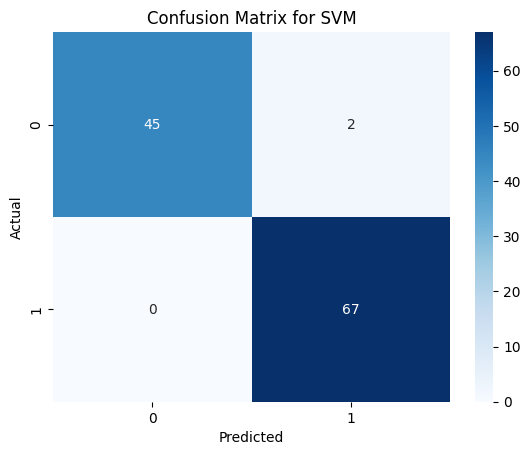

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Re-training the SVM model and predicting
svm.fit(X_train_std, y_train)
svm_predictions = svm.predict(X_test_std)

svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Logistic Regression Model Analysis

Logistic Regression is utilized and trained on the standardized data:

- Train and test set accuracies for the Logistic Regression model are printed.

In [20]:
# Step 8: Logistic Regression model
lr = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=0)
lr.fit(X_train_std, y_train)

Y_pred_train_lr = lr.predict(X_train_std)
print("LR Train Set Accuracy: ", accuracy_score(y_train, Y_pred_train_lr))

Y_pred_test_lr = lr.predict(X_test_std)
print("LR Test Set Accuracy: ", accuracy_score(y_test, Y_pred_test_lr))

LR Train Set Accuracy:  0.989010989010989
LR Test Set Accuracy:  0.9649122807017544


## ROC Curve for Logistic Regression

Receiver Operating Characteristic (ROC) curve for the Logistic Regression model is plotted:

- Predicted probabilities are obtained using `predict_proba`.
- ROC curve and area under the curve (AUC) are plotted.

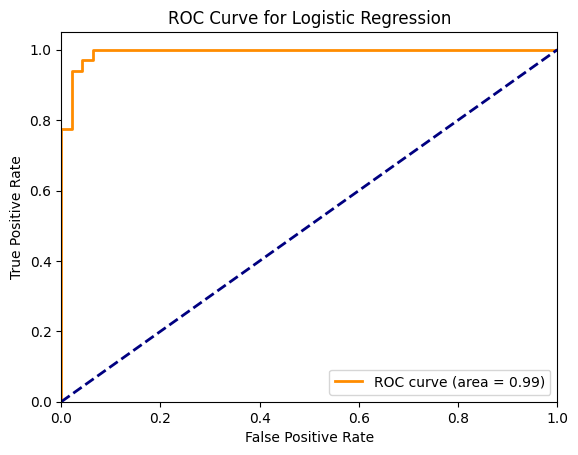

In [36]:
from sklearn.metrics import roc_curve, auc

# Assuming lr is the trained Logistic Regression model
lr.fit(X_train_std, y_train)

# Get predicted probabilities
Y_pred_proba = lr.predict_proba(X_test_std)

# Compute ROC curve and ROC area for each class
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, Y_pred_proba[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [21]:
# Step 9: Accuracy Comparison
print("\nACCURACY COMPARISON:")
print("\tDECISION TREE")
print("\t\tBest Decision Tree Train Set Accuracy: ", accuracy_score(y_train, tree_selected.predict(X_train)))
print("\t\tBest Decision Tree Test Set Accuracy: ", accuracy_score(y_test, tree_selected.predict(X_test)))

print("\n\tSVM")
print("\t\tSVM Train Set Accuracy: ", accuracy_score(y_train, svm.predict(X_train_std)))
print("\t\tSVM Test Set Accuracy: ", accuracy_score(y_test, svm.predict(X_test_std)))

print("\n\tLOGISTIC REGRESSION")
print("\t\tLR Train Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train_std)))
print("\t\tLR Test Set Accuracy: ", accuracy_score(y_test, lr.predict(X_test_std)))


ACCURACY COMPARISON:
	DECISION TREE
		Best Decision Tree Train Set Accuracy:  0.9714285714285714
		Best Decision Tree Test Set Accuracy:  0.9649122807017544

	SVM
		SVM Train Set Accuracy:  0.9846153846153847
		SVM Test Set Accuracy:  0.9824561403508771

	LOGISTIC REGRESSION
		LR Train Set Accuracy:  0.989010989010989
		LR Test Set Accuracy:  0.9649122807017544


## Feature Selection and Hyperparameter Tuning

Feature selection and hyperparameter tuning are performed:

- Recursive Feature Elimination (RFE) with a Decision Tree is used for feature selection.
- GridSearchCV is utilized for hyperparameter tuning of the SVM model.
- Best parameters for SVM are printed.

In [40]:
# RFE for feature selection with Decision Tree
rfe = RFE(estimator=DecisionTreeClassifier(random_state=0), n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = [f for f, s in zip(cancer.feature_names, rfe.support_) if s]

print("\nSelected Features using RFE:")
print(selected_features)

# Filter the dataset with only the selected features
selected_feature_indices = [i for i, feature in enumerate(cancer.feature_names) if feature in selected_features]
X_train_selected = X_train_std[:, selected_feature_indices]
X_test_selected = X_test_std[:, selected_feature_indices]


Selected Features using RFE:
['mean area', 'mean smoothness', 'mean symmetry', 'area error', 'smoothness error', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [41]:
# Hyperparameter tuning for SVM using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
svm_grid = GridSearchCV(SVC(random_state=0), param_grid, cv=5)
svm_grid.fit(X_train_selected, y_train)

print("\nBest parameters for SVM found by GridSearchCV:")
print(svm_grid.best_params_)



Best parameters for SVM found by GridSearchCV:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


## Retraining Models on Selected Features

SVM and Logistic Regression models are retrained using selected features:

- SVM and Logistic Regression models are trained using features selected through RFE.
- Train and test set accuracies for both models are printed.

In [42]:
# Step 11: Retraining SVM and Logistic Regression on Selected Features
# Retraining SVM on selected features
svm_selected = SVC(kernel='rbf', C=svm_grid.best_params_['C'], gamma=svm_grid.best_params_['gamma'], random_state=0)
svm_selected.fit(X_train_std[:, rfe.support_], y_train)

Y_pred_train_svm_selected = svm_selected.predict(X_train_std[:, rfe.support_])
print("\nSVM Train Set Accuracy on Selected Features: ", accuracy_score(y_train, Y_pred_train_svm_selected))

Y_pred_test_svm_selected = svm_selected.predict(X_test_std[:, rfe.support_])
print("SVM Test Set Accuracy on Selected Features: ", accuracy_score(y_test, Y_pred_test_svm_selected))

# Retraining Logistic Regression on selected features
lr_selected = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=0)
lr_selected.fit(X_train_std[:, rfe.support_], y_train)

Y_pred_train_lr_selected = lr_selected.predict(X_train_std[:, rfe.support_])
print("\nLR Train Set Accuracy on Selected Features: ", accuracy_score(y_train, Y_pred_train_lr_selected))

Y_pred_test_lr_selected = lr_selected.predict(X_test_std[:, rfe.support_])
print("LR Test Set Accuracy on Selected Features: ", accuracy_score(y_test, Y_pred_test_lr_selected))


SVM Train Set Accuracy on Selected Features:  0.9846153846153847
SVM Test Set Accuracy on Selected Features:  0.9649122807017544

LR Train Set Accuracy on Selected Features:  0.9802197802197802
LR Test Set Accuracy on Selected Features:  0.9385964912280702


This comprehensive analysis provides insights into the performance of Decision Trees, SVM, and Logistic Regression models for breast cancer classification. It covers feature importance, hyperparameter tuning, and model retraining on selected features for enhanced predictive performance.